In [3]:
 #importing relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
#importing
df = pd.read_csv(r'/Multiple Linear Regression dataset (assignment-5).csv')

In [6]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [7]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
df.drop([21,49], axis=0, inplace=True)

In [9]:
a = df.corr()

<ipython-input-9-fa62f7d60212>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a = df.corr()


In [10]:
a

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.245175,0.714418,0.978645
Administration,0.245175,1.000000,-0.055458,0.210505
Marketing Spend,0.714418,-0.055458,1.000000,0.744335
Profit,0.978645,0.210505,0.744335,1.000000


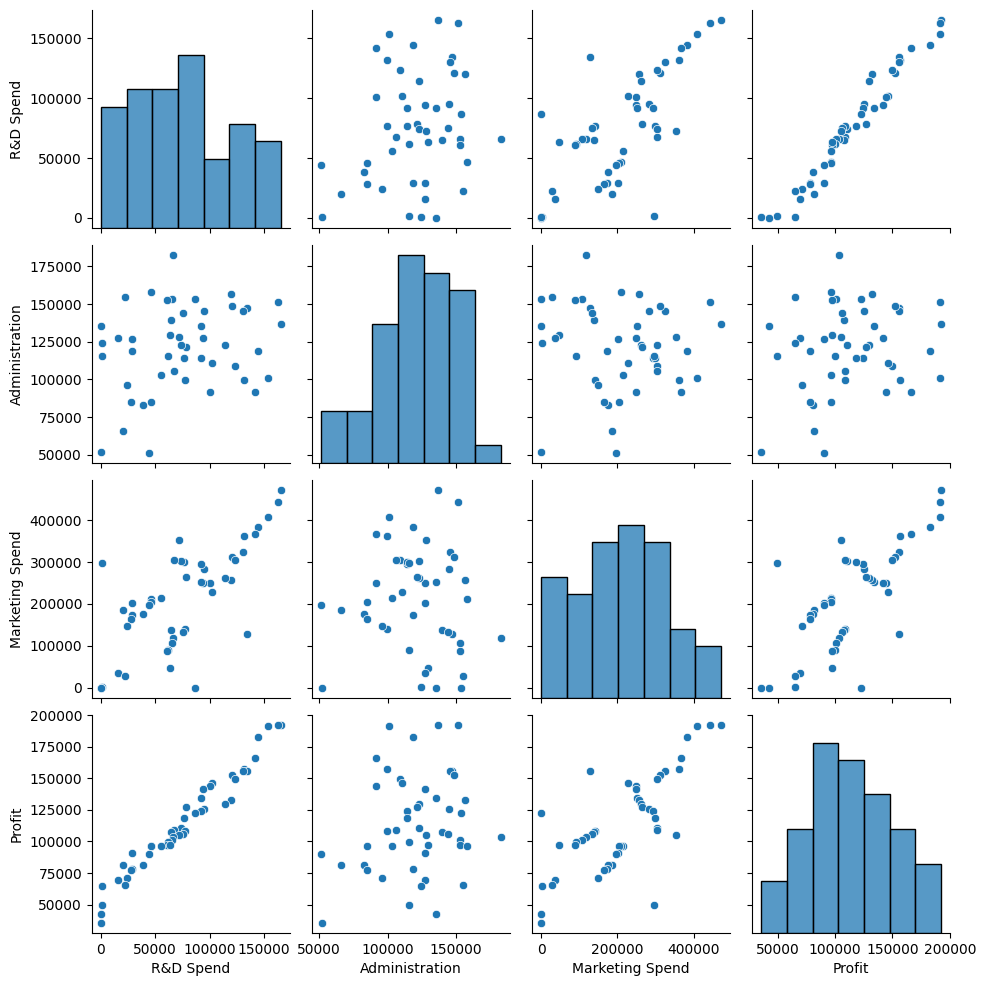

In [11]:
sns.pairplot(df)
plt.show()

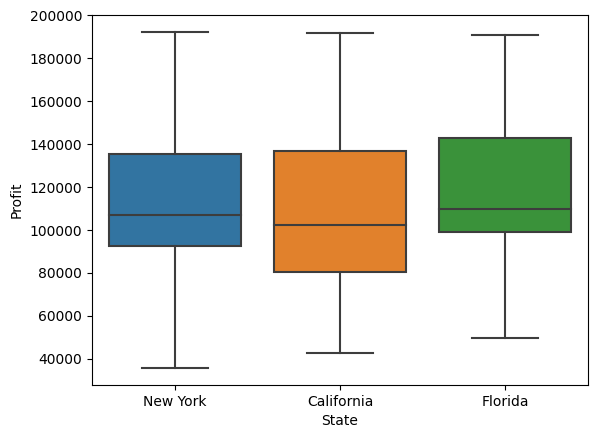

In [12]:
sns.boxplot(x = 'State', y = 'Profit', data = df)
plt.show()

# New section

In [13]:
#removing outliers
def remove_outliers(df,x):
    #set limits
    q25,q75 = np.percentile(df[x],25),np.percentile(df[x],75)
    iqr = q75 - q25
    cut_off = iqr*1.5
    lower,upper = 1,(q75 + cut_off)
    df = df[(df[x] < upper) & (df[x] > lower)]
    print('outliers of "{}" are removed\n'.format(x))
    return df

In [14]:
df = remove_outliers(df,'Profit')

outliers of "Profit" are removed



<ipython-input-15-66b4a0d6427c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[['R&D Spend','Administration','Marketing Spend','State','Profit']].corr(),annot = True);


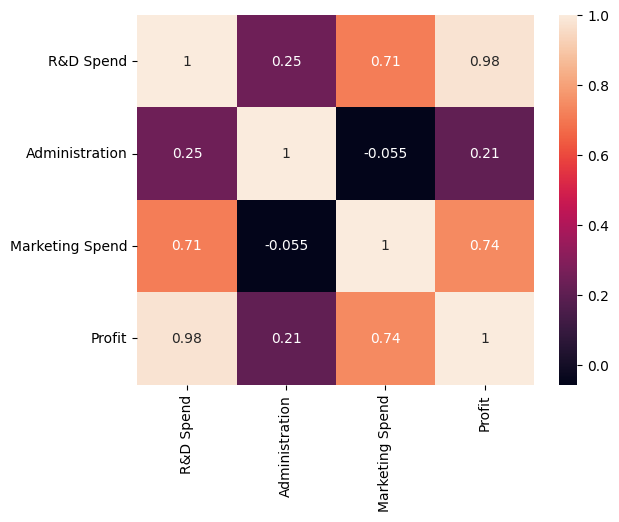

In [15]:
sns.heatmap(df[['R&D Spend','Administration','Marketing Spend','State','Profit']].corr(),annot = True);

In [16]:
# spliting Dataset in Dependent & Independent Variables
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
X1 = pd.DataFrame(X)
X1.head()

,0,1,2,3
0,165349.2,136897.8,471784.1,2
1,162597.7,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.80,random_state=34)
x_train

array([[94657.16, 145077.58, 282574.31, 2],
       [93863.75, 127320.38, 249839.44, 1],
       [20229.59, 65947.93, 185265.1, 2],
       [67532.53, 105751.03, 304768.73, 1],
       [63408.86, 129219.61, 46085.25, 0],
       [153441.51, 101145.55, 407934.54, 1],
       [22177.74, 154806.14, 28334.72, 0],
       [46014.02, 85047.44, 205517.64, 2],
       [0.0, 135426.92, 0.0, 0],
       [77044.01, 99281.34, 140574.81, 2],
       [91992.39, 135495.07, 252664.93, 0],
       [101913.08, 110594.11, 229160.95, 1],
       [114523.61, 122616.84, 261776.23, 2],
       [64664.71, 139553.16, 137962.62, 0],
       [120542.52, 148718.95, 311613.29, 2],
       [72107.6, 127864.55, 353183.81, 2],
       [1000.23, 124153.04, 1903.93, 2],
       [65605.48, 153032.06, 107138.38, 2],
       [86419.7, 153514.11, 0.0, 2],
       [542.05, 51743.15, 0.0, 2],
       [1315.46, 115816.21, 297114.46, 1],
       [61136.38, 152701.92, 88218.23, 2],
       [55493.95, 103057.49, 214634.81, 1],
       [76253.86, 11386

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print('Model has been trained successful')

Model has been trained successful


In [21]:
y_pred = model.predict(x_test)

In [22]:
y_pred

array([ 77579.16852159, 117949.29321444, 187252.31284639, 170206.42964588,
       158548.85710399, 103347.43026986,  76301.4246022 , 188080.62568304,
       158992.910806  , 154509.11762531])

In [23]:
testing_data_model_score = model.score(x_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)
training_data_model_score = model.score(x_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 0.9810782651525768
Model Score/Performance on Training data 0.9457177416302477


In [24]:
df = pd.DataFrame(data={'Predicted value':y_pred.flatten(),'Actual Value':y_test.flatten()})

In [25]:
df

,Predicted value,Actual Value
0,77579.168522,78239.91
1,117949.293214,126992.93
2,187252.312846,191792.06
3,170206.429646,182901.99
4,158548.857104,155752.60
5,103347.430270,103282.38
6,76301.424602,77798.83
7,188080.625683,192261.83
8,158992.910806,156122.51
9,154509.117625,149759.96
